# Titanic : Machine Learning from Disaster

# Step 1 :Importing the dataset

In [301]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\Home\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['table', 'cm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [302]:
dataset=pd.read_csv('train (1).csv')

In [303]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Understanding the data

In [304]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Age,cabin and Embarked are the features have missing values. 

# statistical Summaries using describe()

In [305]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In this summary, summary statistic of passengerid is not useful so it can be ignored.
The features survived is categorical variable. 38% of passengers boarded on the titanic are survived and remaining 62% were dead.
Pcalss,Sibsp and Parch are categorical variable, value_count() function will describe about this data better than summary statistic.
Age feature describes that average age of passenger boarded on the ship is 29.6 and there are children as well. 25% of passenger are less than 14 , 50% of passenger are less than 28 and 75% of passenger are less tahn 38 and remaining passenger ages are between 38 to 80. 
Fare column of summary statistic describes that average fare paid by passenger is 32 and 25% paid less than 7$, 50% of passenger paid less than 14$ and 75% of passenger paid less than 31$ and remaining passenger paid between between 31 and 512$ to board on this ship

In [306]:
dataset.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [307]:
dataset.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [308]:
dataset.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [309]:
dataset.Sex.describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

In [310]:
dataset.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [311]:
dataset.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

The result of Value_counts() is a frequency table of a categorical variable.It gives the count of that variable in each category.
Describe() on categorical variable gives total count, no of categories, top gives highest frequency category and freq gives count of that highest frequnt of that category.

# Inspecting Data visually

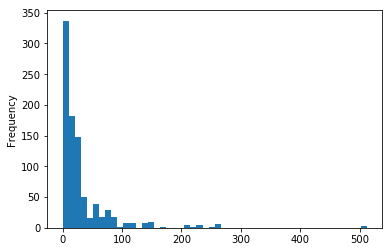

In [312]:
dataset.Fare.plot(kind='hist',bins=50)

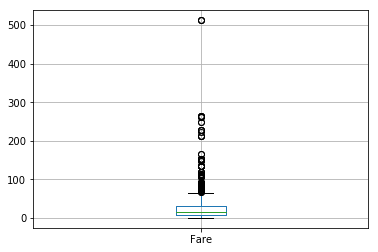

In [313]:
dataset.boxplot(column='Fare')

There is a outliers in the Fare column of dataset which is around 500

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018D0C8FE588>]], dtype=object)

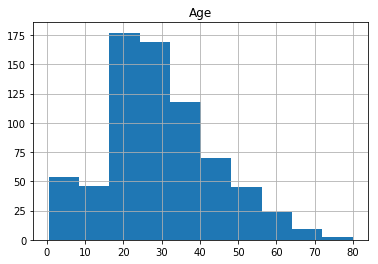

In [314]:
dataset.hist(column='Age')

Most of the passenger travelled are around the age of 20 to 40 and very less no of passengers are above 60

dataset.boxplot(column="Age")

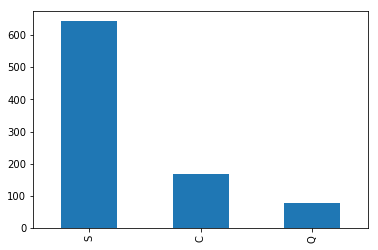

In [315]:
dataset.Embarked.value_counts().plot(kind='bar')

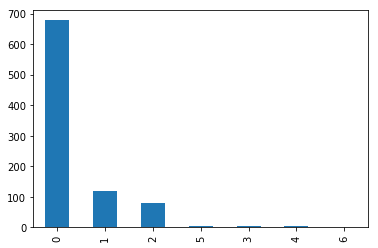

In [316]:
dataset.Parch.value_counts().plot(kind='bar')

Most of the passengers travelled without parents or kids.

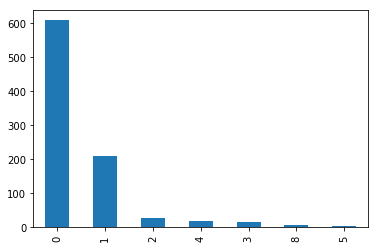

In [317]:
dataset.SibSp.value_counts().plot(kind='bar')

Most of the passengers travelled have no siblings or spouse boarded with them

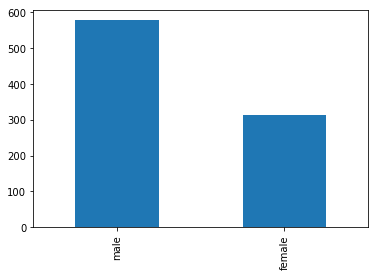

In [318]:
dataset.Sex.value_counts().plot(kind='bar')

More no of Male passengers boarded on the ship.

# Analyze the relationship between the features


In [319]:
#converting categorical variable into binary variable
dataset["Sex"]=dataset.Sex.map({"male":0,"female":1})

In [320]:
dataset[["Age","Survived","Sex"]].groupby(by=['Sex']).mean()

,Age,Survived
Sex,,
0,30.726645,0.188908
1,27.915709,0.742038


Female passengers have  high survival rate - 74%
Average age of female Passenger - 27.9
Average age of Male Passengers - 30.7

In [321]:
dataset[["Age","Fare","Survived"]].groupby(by=['Survived']).mean()

,Age,Fare
Survived,,
0,30.626179,22.117887
1,28.343690,48.395408


Fare is related to survival rate , its describes that passengers have paid higher fare tickets are survived than low fare ticket.It tells the likelihood of first class passengers have higher survival rate, bcoz first class fare is higher than other classes.Fare column correlates with pclass and survived column.

In [322]:
dataset[["Age","Fare","Pclass","Survived"]].groupby(by=["Pclass"]).mean()

,Age,Fare,Survived
Pclass,,,
1,38.233441,84.154687,0.629630
2,29.877630,20.662183,0.472826
3,25.140620,13.675550,0.242363


It shows that Pclass and Survived features are realted.First class passengers have high survival rate.

In [323]:
dataset[["SibSp","Survived"]].groupby(by=["SibSp"]).mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [324]:
dataset[["Parch","Survived"]].groupby(by=["Parch"]).mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


Feature Engineering: 
Extracting title from the name.


In [325]:
dataset['title']=dataset['Name'].map(lambda name : name.split(',')[1].split('.')[0].strip())
dataset.title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [326]:
dataset['title']=dataset.title.map({ "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"})

In [327]:
dataset.title.value_counts()

Mr         517
Miss       184
Mrs        127
Master      40
Officer     18
Royalty      5
Name: title, dtype: int64

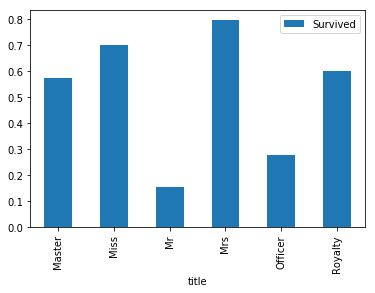

In [328]:
dataset[['title','Survived']].groupby(by=['title']).mean().plot(kind='bar')

From this,I observe that survival rate for children, female and First class passengers are high.


In [329]:
dataset[['Embarked','Survived']].groupby(by=['Embarked']).mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


Passenger who boarded the ship at C Embarked has high survival rate.

# Handling missing values

In [330]:
#filling Embarked column

In [331]:
dataset.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Passenger boarded the titanic shop at S is high so it make sense to fill the missing value by "S"

In [332]:
dataset.Embarked.fillna(value='S',inplace=True)

In [333]:
dataset.Embarked.isnull().sum()

0

# filling the missing value of Age column

In [334]:
table=dataset.pivot_table(values='Age',index='title',aggfunc=np.median)
table

title
Master      3.5
Miss       21.0
Mr         30.0
Mrs        35.0
Officer    50.0
Royalty    40.0
Name: Age, dtype: float64

In [335]:
#replace mising value of age by mean of its title
def fage(X):
    return table.loc[X["title"]]
#replace missing value
dataset["Age"].fillna(dataset[dataset.Age.isnull()].apply(fage,axis=1),inplace=True)

In [336]:
dataset.Age.isnull().sum()

0

One common way to impute the missing value by taking Mean or median. It make sense to take median if that column has outliers because outlier has less effect on Median than mean. 
In this age column instead of directly take mean for entire age column, it make sense to category the passengers into children, male, female , officer and Royalty which is done by feature engineering. Then take mean for each category and then fill missing value of Age column by mean of its category. 

# Building the model

First thing we need to decide the list of predictors from the given data set as per data understanding process to build matrixes of independent variable. And also build dependent variable vector.
2. Converting categorical variable into numeric variable,Classifier algorithm works on numeric data.
3. Normalizing the features - converting all features to the same scale ie. all values of each feature will fall between -1 to 1
4. Perform cross validation to avoid overfitting- ie your model perfrom well  on traiing set but when new data set is given it gets much lower accuracy,spliting the train set of data into k fold. so model will have more no of samples to get train 
5. I am going to experiment with following classifier
    1. Logistic Regression
    2. Gradient Discendent Classifier
    3. Random Forest classifier
    4. Support vector classifier
    5. KNearestNeighbor classifier
    6. Naive bayes classifier
 
6. Calculate the accuracy of each model and finding the  model gets high accuracy.

In [337]:
#First step : Identifying predictors
predictor=['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare',  'Embarked', 'title']


In [338]:
dataset[predictor].head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,3,0,22.0,1,0,7.2500,S,Mr
1,1,1,38.0,1,0,71.2833,C,Mrs
2,3,1,26.0,0,0,7.9250,S,Miss
3,1,1,35.0,1,0,53.1000,S,Mrs
4,3,0,35.0,0,0,8.0500,S,Mr


In [339]:
#Matrics of predictors and vector of dependent variable
X=dataset[predictor]
y=dataset['Survived']

In [340]:
#converting categorical variable into numeric variable
from sklearn.preprocessing import LabelEncoder
labelencoder_X=LabelEncoder()
X.iloc[:,6]=labelencoder_X.fit_transform(X.iloc[:,6])
X.iloc[:,7]=labelencoder_X.fit_transform(X.iloc[:,7])

C:\Users\Home\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [341]:
#normalizing the data
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X=sc_X.fit_transform(X)

In [342]:
#splitting training using 10 fold and building Logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_predict
from sklearn.metrics import confusion_matrix,accuracy_score
classifier=LogisticRegression()
y_predict=cross_val_predict(classifier,X,y,cv=10)
cm=confusion_matrix(y,y_predict)
accuracy=accuracy_score(y,y_predict)
accuracy

0.79685746352413023

In [343]:
#building Random forest classifier
from sklearn.ensemble import RandomForestClassifier
classifier_RF=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
y_predict=cross_val_predict(classifier_RF,X,y,cv=10)
cm=confusion_matrix(y,y_predict)
accuracy=accuracy_score(y,y_predict)
accuracy

0.80246913580246915

In [344]:
#Building SGD model
from sklearn.linear_model import SGDClassifier
classifier_SGD=SGDClassifier(loss='log',random_state=0)
y_predict=cross_val_predict(classifier_SGD,X,y,cv=10)
cm=confusion_matrix(y,y_predict)
accuracy=accuracy_score(y,y_predict)
accuracy



0.70145903479236815

In [345]:
#Building SVC model
from sklearn.svm import SVC
svc=SVC(kernel='rbf',random_state=0)
y_predict=cross_val_predict(svc,X,y,cv=10)
cm=confusion_matrix(y,y_predict)
accuracy=accuracy_score(y,y_predict)
accuracy

0.83501683501683499

In [346]:
#Building KNN classifier
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN=KNeighborsClassifier(n_neighbors=10,p=2,metric='minkowski')
y_predict=cross_val_predict(classifier_KNN,X,y,cv=10)
cm=confusion_matrix(y,y_predict)
accuracy=accuracy_score(y,y_predict)
accuracy

0.83164983164983164

In [347]:
#Building Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
classifier_NB=GaussianNB()
y_predict=cross_val_predict(classifier_NB,X,y,cv=10)
cm=confusion_matrix(y,y_predict)
accuracy=accuracy_score(y,y_predict)
accuracy

0.79012345679012341

Conclusion : Support vector classifier and KNN classifier best suits this dataset and yields better accuracy of 83%

# Importing test data

In [348]:
testdata=pd.read_csv('test.csv')
testdata.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# understanding the data 

In [349]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Some understanding : Age column has 86 missing values anf Fare column has one missing value

In [350]:
#Filling missing value of Age column
testdata['title']=testdata['Name'].apply(lambda name : name.split(',')[1].split('.')[0].strip())

In [351]:
testdata.title.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Dr          1
Ms          1
Name: title, dtype: int64

In [352]:
testdata['title']=testdata.title.map({"Col":        "Officer",
                    "Major":      "Officer",
                    "Don":        "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"})

In [353]:
testdata.title.value_counts()

Mr         240
Miss        78
Mrs         73
Master      21
Officer      5
Royalty      1
Name: title, dtype: int64

In [354]:
table=testdata.pivot_table(values='Age',index='title',aggfunc=np.mean)
table

title
Master      7.406471
Miss       21.774844
Mr         32.000000
Mrs        38.903226
Officer    44.800000
Royalty    39.000000
Name: Age, dtype: float64

In [355]:
def fill_age(X):
    return table.loc[X['title']]
testdata.Age.fillna(testdata[testdata.Age.isnull()].apply(fill_age,axis=1),inplace=True)
    

In [356]:
testdata['Fare']=testdata.Fare.fillna(testdata.Fare.median())

In [370]:
testdata['Sex']=testdata.Sex.map({'male':0,'female':1})

# Applying the SVC model on test data

In [371]:
#Build the matrix of predictor
X_test=testdata[predictor]

#Applying label encoder to convert categorical variable into binary
labelencoder=LabelEncoder()
X_test.iloc[:,6]=labelencoder.fit_transform(X_test.iloc[:,6])
X_test.iloc[:,7]=labelencoder.fit_transform(X_test.iloc[:,7])
#Feature scaling
X_test=sc_X.fit_transform(X_test)
#fitting svc algorithm on train data
svc.fit(X,y)

C:\Users\Home\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [372]:
#predictig the dependent varaible- Survived using Support vector classifier
y_predict=svc.predict(X_test)


In [373]:
submission=pd.DataFrame({'PassengerId': testdata['PassengerId'],'Survived':y_predict})
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [374]:
testdata['Survived']=submission['Survived']

In [377]:
testdata.loc[:,['Sex','Survived']]
testdata.pivot_table(values='Survived',index='title',aggfunc=np.mean)

title
Master     0.761905
Miss       0.935897
Mr         0.000000
Mrs        0.958904
Officer    0.000000
Royalty    1.000000
Name: Survived, dtype: float64

In [378]:
testdata[['Pclass','Survived']].groupby(by=['Pclass']).mean()

,Survived
Pclass,
1,0.476636
2,0.344086
3,0.353211


In [380]:
testdata[['Sex','Survived']].groupby(by=['Sex']).mean()

,Survived
Sex,
0,0.060150
1,0.947368


In [383]:
testdata[['Embarked','Survived']].groupby(by=['Embarked']).mean()

,Survived
Embarked,
C,0.450980
Q,0.521739
S,0.333333


Conclusion on test data:
This model predicts higher survival rate of female than male
It also predicts the children, Female and Royality group of passengers survival rate is high.
No of First class passengers survived are high.